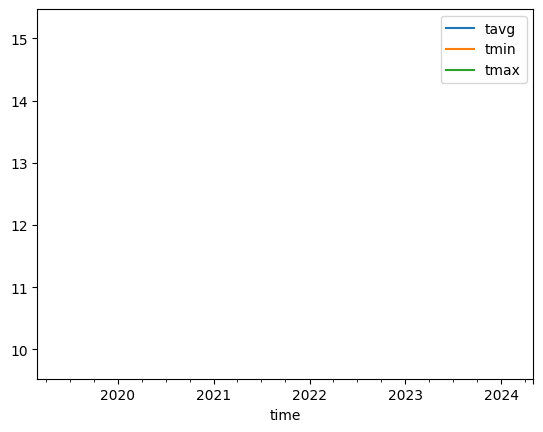

In [4]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2021, 10, 1)
end = datetime(2021, 10, 1)

# Create Point for Vancouver, BC
location = Point(49.2497, -123.1193, 70)

# Get daily data for 2018
data = Daily(location, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [2]:
data

,,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
station,time,,,,,,,,,,


In [1]:
# import the module
import python_weather

import asyncio
import os

async def getweather():
  # declare the client. the measuring unit used defaults to the metric system (celcius, km/h, etc.)
  async with python_weather.Client(unit=python_weather.IMPERIAL) as client:
    # fetch a weather forecast from a city
    weather = await client.get('New York')
    
    # returns the current day's forecast temperature (int)
    print(weather.temperature)
    
    # get the weather forecast for a few days
    for daily in weather.daily_forecasts:
      print(daily)
      
      # hourly forecasts
      for hourly in daily.hourly_forecasts:
        print(f' --> {hourly!r}')

if __name__ == '__main__':
  # see https://stackoverflow.com/questions/45600579/asyncio-event-loop-is-closed-when-getting-loop
  # for more details
  if os.name == 'nt':
    asyncio.set_event_loop_policy(asyncio.WindowsSelectorEventLoopPolicy())
  
  asyncio.run(getweather())

RuntimeError: asyncio.run() cannot be called from a running event loop